In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def build_map(df, col_name):
    key = df[col_name].unique().tolist()
    m = dict(zip(key, range(len(key))))
    df[col_name] = df[col_name].map(lambda x: m[x])
    return df

In [451]:
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
train_data#不是按时间来排序的

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,32019,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917526,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,33959,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,154.34,1
9917527,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,35240,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917528,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,94437,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [26]:
train_data['day'] = pd.to_datetime(train_data['date_time']).dt.date
train_data['date_time'] = pd.to_datetime(train_data['date_time'])

In [3]:
train_data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [27]:
train_data = train_data[['srch_id', 'prop_id','day', 'date_time', 'booking_bool',
                          'srch_destination_id',
                         'prop_brand_bool', 'prop_starrating', 'prop_review_score', 
                         'prop_location_score1', 'prop_log_historical_price','price_usd']]

In [28]:
train_data['count'] = 1
count = train_data[['srch_destination_id','count']]
count = count.groupby('srch_destination_id').sum()
count.sort_values(by="count",ascending=False)[0:10] #选目的地8192

/tmp/ipykernel_587844/2948990174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['count'] = 1


,count
srch_destination_id,
8192,140182
4562,114350
9402,82842
10979,69369
8347,64198
13292,63602
13870,60151
18774,53072
23904,52679


In [222]:
des8192 = train_data[train_data['srch_destination_id']==8192]
des8192 = des8192.drop(columns=['srch_destination_id','count'])
print('unique srch number: ',len(des8192['srch_id'].unique()))
des8192['prop_review_score'].fillna(des8192['prop_review_score'].mean(), inplace=True)
des8192

unique srch number:  4925


,srch_id,prop_id,day,date_time,booking_bool,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd
737,63,14082,2013-05-23,2013-05-23 11:56:25,0,1,4,4.0,4.29,5.35,107.71
738,63,24545,2013-05-23,2013-05-23 11:56:25,0,0,4,4.0,4.04,5.20,92.19
739,63,38419,2013-05-23,2013-05-23 11:56:25,0,1,5,4.0,4.19,5.61,128.09
740,63,40279,2013-05-23,2013-05-23 11:56:25,0,1,5,4.5,4.29,5.96,164.97
741,63,46274,2013-05-23,2013-05-23 11:56:25,0,1,5,4.5,4.08,5.89,141.68
...,...,...,...,...,...,...,...,...,...,...,...
9917400,665567,124342,2013-02-23,2013-02-23 11:03:49,0,1,4,4.0,4.19,5.31,129.00
9917401,665567,125083,2013-02-23,2013-02-23 11:03:49,0,1,4,4.5,3.61,5.07,116.00
9917402,665567,131892,2013-02-23,2013-02-23 11:03:49,0,1,4,4.0,4.25,4.98,99.00
9917403,665567,134154,2013-02-23,2013-02-23 11:03:49,0,1,3,3.5,3.76,4.63,74.00


In [520]:
len(des8192['prop_id'].unique())

126

In [257]:
prop_cols = ['prop_id','prop_brand_bool','prop_starrating','prop_review_score','prop_location_score1','prop_log_historical_price','price_usd']
prop_record = des8192[prop_cols]
prop_record = prop_record[prop_record['prop_id'].isin(prop_record.value_counts('prop_id')[:30].index)]
prop_info = prop_record.groupby('prop_id').mean()
prop_info['price_usd'].mean()
prop_info['price_usd'].var()**0.5
for col in ['prop_starrating','prop_review_score','prop_location_score1','prop_log_historical_price','price_usd']:
    prop_info[col]=(prop_info[col]-prop_info[col].mean())/(prop_info[col].var()**0.5)
prop_info

/tmp/ipykernel_587844/3129988349.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  prop_record = prop_record[prop_record['prop_id'].isin(prop_record.value_counts('prop_id')[:30].index)]


155.80223688903845

72.28387477455188

,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd
prop_id,,,,,,
14082,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
21018,1.0,-0.182574,-0.175458,-1.932525,0.298435,0.191771
24545,0.0,-0.182574,-0.175458,0.007421,-0.439368,-0.649317
35223,1.0,-0.182574,-0.175458,0.834282,-0.056776,-0.100269
37818,1.0,-0.182574,-1.228207,-0.278801,-0.542900,-0.854795
38419,1.0,1.186732,-0.175458,0.484456,0.482743,0.673613
40279,1.0,1.186732,0.877291,0.802480,1.400832,1.152299
46274,1.0,1.186732,0.877291,0.134630,1.165480,1.606003
49656,0.0,-1.551881,-1.228207,-0.883046,-1.182863,-1.214492


In [477]:
np.max(prop_info['price_usd'])*72.28387477455188+155.80223688903845

286.44749863163656

In [264]:
des8192_use = des8192[des8192['prop_id'].isin(prop_info.index)]
des8192_use = des8192_use[['srch_id','prop_id','day','date_time','booking_bool']].merge(prop_info.reset_index())

In [265]:
des8192_use

,srch_id,prop_id,day,date_time,booking_bool,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd
0,63,14082,2013-05-23,2013-05-23 11:56:25,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
1,90,14082,2013-04-23,2013-04-23 11:12:24,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
2,133,14082,2013-03-14,2013-03-14 11:27:28,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
3,148,14082,2013-03-21,2013-03-21 02:24:03,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
4,203,14082,2013-01-03,2013-01-03 20:48:24,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
...,...,...,...,...,...,...,...,...,...,...,...
121186,664458,117294,2013-06-08,2013-06-08 10:13:17,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392
121187,665178,117294,2013-02-23,2013-02-23 12:27:10,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392
121188,665454,117294,2012-11-17,2012-11-17 17:53:21,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392
121189,665512,117294,2013-04-26,2013-04-26 18:52:31,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392


In [521]:
len(des8192_use['srch_id'].unique())

4922

In [266]:
#把prop_id对应到0到29的数
copydata = des8192_use.copy()
unique_prop = copydata['prop_id'].unique()
i = 0
for prop_id in unique_prop:
    copydata['prop_id'].loc[copydata['prop_id']==prop_id] = i
    i += 1
copydata

/tmp/ipykernel_587844/3393024855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copydata['prop_id'].loc[copydata['prop_id']==prop_id] = i


,srch_id,prop_id,day,date_time,booking_bool,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd
0,63,0,2013-05-23,2013-05-23 11:56:25,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
1,90,0,2013-04-23,2013-04-23 11:12:24,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
2,133,0,2013-03-14,2013-03-14 11:27:28,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
3,148,0,2013-03-21,2013-03-21 02:24:03,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
4,203,0,2013-01-03,2013-01-03 20:48:24,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895
...,...,...,...,...,...,...,...,...,...,...,...
121186,664458,29,2013-06-08,2013-06-08 10:13:17,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392
121187,665178,29,2013-02-23,2013-02-23 12:27:10,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392
121188,665454,29,2012-11-17,2012-11-17 17:53:21,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392
121189,665512,29,2013-04-26,2013-04-26 18:52:31,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392


In [286]:
#根据每个人浏览的平均价格分类
srch_mean_price = copydata[['srch_id','price_usd']]
srch_mean_price = srch_mean_price.groupby('srch_id').mean()

array([[<AxesSubplot: title={'center': 'price_usd'}>]], dtype=object)

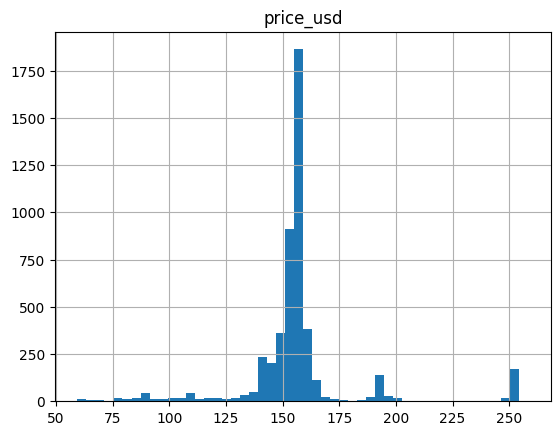

In [490]:
price_hist = 155.80223688903845 + srch_mean_price['price_usd']*72.28387477455188
pd.DataFrame(price_hist).hist('price_usd',bins=50,grid='y')
plt.show()
plt.savefig(r'new/'+'price'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')  

<BarContainer object of 2045 artists>

Text(0, 0.5, '#Searches')

Text(0.5, 0, 'Price')

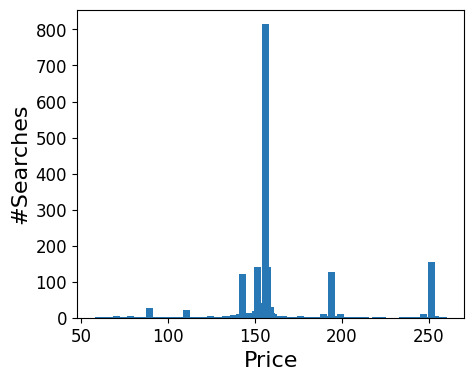

In [523]:
price_srch_num = price_hist.value_counts().values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
ax.bar(price_hist.value_counts().index,price_srch_num,width=4,color='#2878B5')
#plt.axvline(151.29722786343166,color='#F8AC8C',linewidth=1)
#plt.axvline(155.80223688903848,color='#F8AC8C',linewidth=1)
#plt.axvline(157.84332742450508,color='#F8AC8C',linewidth=1)
#ax.set_title('test title')
ax.set_ylabel("#Searches",fontsize=16)
ax.set_xlabel("Price",fontsize=16)
plt.tick_params(labelsize=12)
plt.savefig(r'new/'+'price'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')     
plt.show()

In [483]:
price_hist.value_counts()

155.802237    814
251.451411    155
151.297228    142
157.181817    142
194.273972    127
             ... 
156.537588      1
164.970239      1
142.128226      1
158.743409      1
153.202381      1
Name: price_usd, Length: 2045, dtype: int64

In [283]:
l1 = srch_mean_price['price_usd'].quantile(0.25)
l2 = srch_mean_price['price_usd'].quantile(0.5)
l3 = srch_mean_price['price_usd'].quantile(0.75)
155.80223688903845 + l1*72.28387477455188
155.80223688903845 + l2*72.28387477455188
155.80223688903845 + l3*72.28387477455188
des8192buy1 = srch_mean_price[srch_mean_price['price_usd']<=l1]
des8192buy2 = srch_mean_price[srch_mean_price['price_usd']>l1]
des8192buy2 = des8192buy2[des8192buy2['price_usd']<=l2]
des8192buy3 = srch_mean_price[srch_mean_price['price_usd']>l2]
des8192buy3 = des8192buy3[des8192buy3['price_usd']<=l3]
des8192buy4 = srch_mean_price[srch_mean_price['price_usd']>l3]
total_len=len(des8192buy1)+len(des8192buy2)+len(des8192buy3)+len(des8192buy4)
len(des8192buy1)/total_len
len(des8192buy2)/total_len
len(des8192buy3)/total_len
len(des8192buy4)/total_len
len(des8192buy1)
len(des8192buy2)
len(des8192buy3)
len(des8192buy4)#总共5000个srch

151.29722786343166

155.80223688903848

157.84332742450508

0.2777326290125965

0.3380739536773669

0.13429500203169442

0.24989841527834214

1367

1664

661

1230

In [288]:
des8192buy1['type'] = 1
des8192buy2['type'] = 2
des8192buy3['type'] = 3
des8192buy4['type'] = 4
des8192buy_type = pd.concat([des8192buy1,des8192buy2,des8192buy3,des8192buy4])
srch_type = des8192buy_type.reset_index().sort_values(by='srch_id')
des8192_custype = copydata.merge(srch_type[['srch_id','type']])
des8192_custype

,srch_id,prop_id,day,date_time,booking_bool,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd,type
0,63,0,2013-05-23,2013-05-23 11:56:25,0,1.0,-0.182574,-0.175458,0.802480,-0.163961,-0.061895,4
1,63,1,2013-05-23,2013-05-23 11:56:25,0,0.0,-0.182574,-0.175458,0.007421,-0.439368,-0.649317,4
2,63,2,2013-05-23,2013-05-23 11:56:25,0,1.0,1.186732,-0.175458,0.484456,0.482743,0.673613,4
3,63,3,2013-05-23,2013-05-23 11:56:25,0,1.0,1.186732,0.877291,0.802480,1.400832,1.152299,4
4,63,4,2013-05-23,2013-05-23 11:56:25,0,1.0,1.186732,0.877291,0.134630,1.165480,1.606003,4
...,...,...,...,...,...,...,...,...,...,...,...,...
121186,568272,26,2013-04-17,2013-04-17 14:07:15,0,1.0,-0.182574,0.877291,-1.360082,-0.808960,-0.553482,4
121187,568272,29,2013-04-17,2013-04-17 14:07:15,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392,4
121188,573997,24,2013-04-27,2013-04-27 16:05:53,1,1.0,-1.551881,-0.175458,0.897887,-0.366298,-0.404549,4
121189,573997,26,2013-04-27,2013-04-27 16:05:53,0,1.0,-0.182574,0.877291,-1.360082,-0.808960,-0.553482,4


,srch_id,prop_id,day,date_time,booking_bool,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd,type
0,416498,29,2012-11-01,2012-11-01 02:14:22,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392,2
1,416498,3,2012-11-01,2012-11-01 02:14:22,0,1.0,1.186732,0.877291,0.802480,1.400832,1.152299,2
2,416498,4,2012-11-01,2012-11-01 02:14:22,0,1.0,1.186732,0.877291,0.134630,1.165480,1.606003,2
3,416498,5,2012-11-01,2012-11-01 02:14:22,0,0.0,1.186732,0.877291,0.929690,1.134379,1.296441,2
4,416498,6,2012-11-01,2012-11-01 02:14:22,0,1.0,1.186732,0.877291,0.389049,1.224765,1.060204,2
...,...,...,...,...,...,...,...,...,...,...,...,...
121186,255178,28,2013-06-30,2013-06-30 22:50:21,0,1.0,-1.551881,-1.228207,-0.883046,-1.792111,-1.362700,1
121187,255178,27,2013-06-30,2013-06-30 22:50:21,0,1.0,-0.182574,-0.175458,0.675271,-0.959788,-0.673217,1
121188,255178,9,2013-06-30,2013-06-30 22:50:21,0,1.0,-0.182574,-0.175458,0.389049,-0.186266,-0.624354,1
121189,255178,24,2013-06-30,2013-06-30 22:50:21,0,1.0,-1.551881,-0.175458,0.897887,-0.366298,-0.404549,1


2012-12-27    41
2013-03-18    39
2013-01-07    39
2013-01-09    36
2013-01-08    36
              ..
2013-04-20     9
2013-05-26     9
2013-03-30     8
2013-06-28     8
2013-06-29     8
Name: day, Length: 242, dtype: int64

array([[<AxesSubplot: title={'center': 'day'}>]], dtype=object)

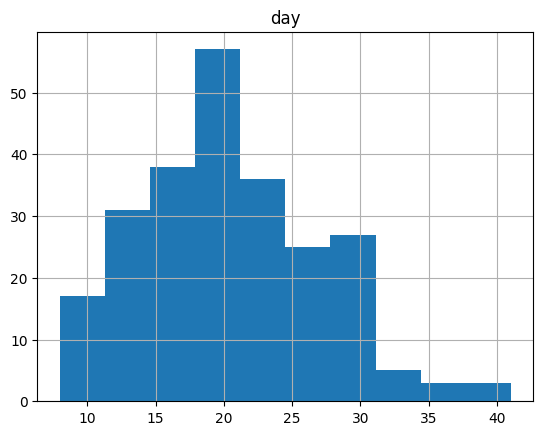

In [408]:
use_data = des8192_custype.sort_values(by='date_time')
use_data = use_data.reset_index(drop=True)
use_data
srch_id_ = use_data[['srch_id','day']].drop_duplicates()
srch_id_.day.value_counts()
pd.DataFrame(srch_id_.day.value_counts()).hist()

array([[<AxesSubplot: title={'center': 'day'}>]], dtype=object)

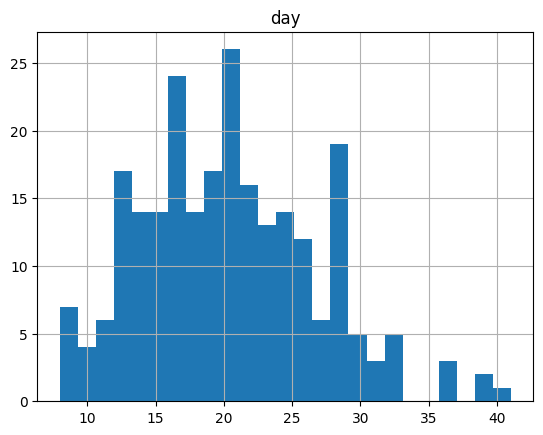

In [436]:
pd.DataFrame(srch_id_.day.value_counts()).hist(bins=25)

(array([ 7.,  4.,  6., 17., 14., 14., 24., 14., 17., 26., 16., 13., 14.,
        12.,  6., 19.,  5.,  3.,  5.,  0.,  0.,  3.,  0.,  2.,  1.]),
 array([ 8.  ,  9.32, 10.64, 11.96, 13.28, 14.6 , 15.92, 17.24, 18.56,
        19.88, 21.2 , 22.52, 23.84, 25.16, 26.48, 27.8 , 29.12, 30.44,
        31.76, 33.08, 34.4 , 35.72, 37.04, 38.36, 39.68, 41.  ]),
 <BarContainer object of 25 artists>)

Text(0.5, 0, '#Arrivals')

Text(0, 0.5, '#Days')

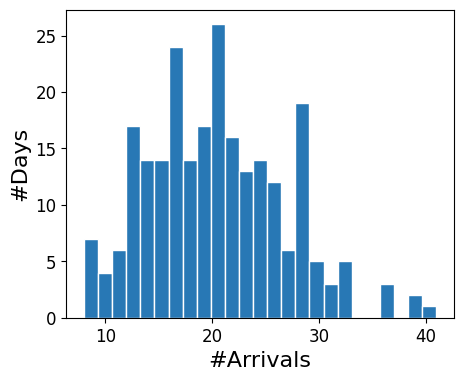

In [524]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
day_person_num = srch_id_.day.value_counts().values
ax.hist(day_person_num,bins=25,color='#2878B5',edgecolor='white')
#ax.set_title('test title')
ax.set_xlabel("#Arrivals",fontsize=16)
ax.set_ylabel("#Days",fontsize=16)
plt.tick_params(labelsize=12)
#plt.axvline(151.29722786343166,color='#F8AC8C',linewidth=1)
#plt.axvline(155.80223688903848,color='#F8AC8C',linewidth=1)
#plt.axvline(157.84332742450508,color='#F8AC8C',linewidth=1)
#ax.set_title('test title')
plt.savefig(r'new/'+'arrivals'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')     
plt.show()

In [314]:
day_cusnum = pd.DataFrame(srch_id_.day.value_counts())
day_use = day_cusnum.loc[(day_cusnum['day']>11) & (day_cusnum['day']<31)].index
day_use#211天

Index([2013-01-13, 2012-12-19, 2013-02-11, 2012-11-21, 2013-01-14, 2013-01-16,
       2013-01-15, 2013-01-23, 2013-04-09, 2013-02-25,
       ...
       2013-05-27, 2012-12-15, 2013-04-27, 2012-11-10, 2012-11-16, 2013-05-10,
       2013-03-29, 2013-04-28, 2012-11-12, 2013-05-25],
      dtype='object', length=211)

In [409]:
use_data = use_data[use_data['day'].isin(day_use)]

In [522]:
use_data

,srch_id,prop_id,booking_bool,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd,type
0,416498,29,0,1.0,1.186732,1.930040,-2.123339,1.329998,1.807392,2
1,416498,3,0,1.0,1.186732,0.877291,0.802480,1.400832,1.152299,2
2,416498,4,0,1.0,1.186732,0.877291,0.134630,1.165480,1.606003,2
3,416498,5,0,0.0,1.186732,0.877291,0.929690,1.134379,1.296441,2
4,416498,6,0,1.0,1.186732,0.877291,0.389049,1.224765,1.060204,2
...,...,...,...,...,...,...,...,...,...,...
120574,67943,10,0,0.0,-0.182574,-0.175458,0.071025,-0.256136,-0.466080,4
120575,67943,12,0,1.0,-0.182574,-0.175458,0.166432,0.418558,-0.252492,4
120576,67943,13,0,1.0,-0.182574,-0.175458,-1.932525,0.298435,0.191771,4
120577,67943,7,0,1.0,1.186732,0.877291,0.230037,1.132888,1.139548,4


In [323]:
day_srch_type = use_data[['day','srch_id','type']].sort_values(by='day').drop_duplicates()
day_srch_type['count'] = 1
day_type_count = day_srch_type[['day','type','count']].groupby(['day','type']).sum()
day_type_count

count
day        type       
2012-11-01 1         5
           2         9
           3         2
           4         6
2012-11-02 1         8
...                ...
2013-06-26 4         7
2013-06-27 1         6
           2         5
           3         2
           4         9

[826 rows x 1 columns]

In [399]:
seq = {}
i = 1
for day in use_data['day'].unique():
    seq[i] = list(day_srch_type[['day','type']][day_srch_type[['day','type']]['day']==day]['type'].values)
    i += 1
#day_srch_type[['day','type']]

In [400]:
type1_prob = len(des8192buy1)/total_len
type2_prob = len(des8192buy2)/total_len
type3_prob = len(des8192buy3)/total_len
type4_prob = len(des8192buy4)/total_len
type1_prob+type2_prob+type3_prob+type4_prob
p_ = [type1_prob,type2_prob,type3_prob,type4_prob]
for day in seq.keys():
    for i in range(100):
        seq[day].append(np.random.choice(range(1,5),size=1,p=p_)[0])

1.0

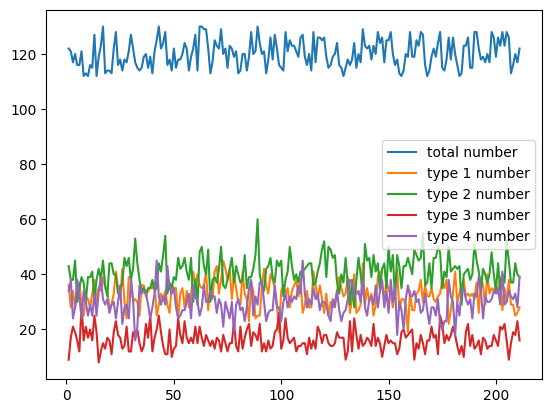

In [372]:
import matplotlib.pyplot as plt
day_type_count = {'all':list(),1:list(),2:list(),3:list(),4:list()}
for day in seq.keys():
    day_type_count['all'].append(len(seq[day]))
    for i in range(1,5):
        day_type_count[i].append(seq[day].count(i))
x = range(1,212)
plt.plot(x,day_type_count['all'],label='total number')
plt.plot(x,day_type_count[1],label='type 1 number')
plt.plot(x,day_type_count[2],label='type 2 number')
plt.plot(x,day_type_count[3],label='type 3 number')
plt.plot(x,day_type_count[4],label='type 4 number')
plt.legend(loc='center right')
plt.show()

<BarContainer object of 22 artists>

<BarContainer object of 22 artists>

<BarContainer object of 22 artists>

<BarContainer object of 22 artists>

Text(0.5, 0, 'Day ID')

Text(0, 0.5, '#Arrivals')

(5.0, 220.0)

(0.0, 190.0)

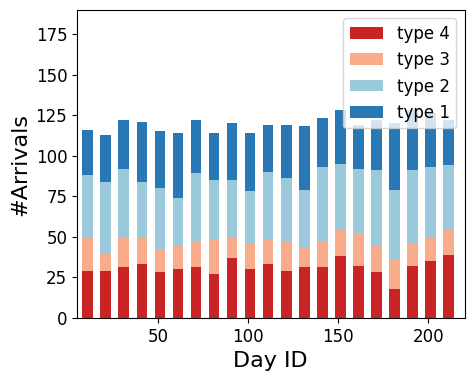

In [525]:
x = range(1,212)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
ax.bar(x[::10],day_type_count[4][::10],width=6,label='type 4 number',color='#C82423')
ax.bar(x[::10],day_type_count[3][::10],width=6,bottom=day_type_count[4][::10],label='type 3 number',color='#F8AC8C')
ax.bar(x[::10],day_type_count[2][::10],width=6,bottom=(np.array(day_type_count[4])+np.array(day_type_count[3]))[::10]
                                            ,label='type 2 number',color='#9AC9DB')
ax.bar(x[::10],day_type_count[1][::10],width=6,bottom=(np.array(day_type_count[4])+np.array(day_type_count[3])+
                                                np.array(day_type_count[2]))[::10],label='type 1 number',color='#2878B5')
ax.set_xlabel("Day ID",fontsize=16)
ax.set_ylabel("#Arrivals",fontsize=16)
plt.xlim(5,220)
plt.ylim(0,190)
plt.tick_params(labelsize=12)
plt.legend(['type 4','type 3','type 2','type 1'],loc='upper right',prop = {'size':12})
plt.savefig(r'new/'+'day_arrivals'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')  
plt.show()

In [404]:
import json
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)
seqdata = json.dumps(seq,cls=NpEncoder)  
with open('new/seqdata.json', 'w') as json_file:
        json_file.write(seqdata)

77907

In [410]:
use_data.drop(columns=['day','date_time'],inplace=True)
use_data1 = use_data[use_data['type']==1]
use_data2 = use_data[use_data['type']==2]
use_data3 = use_data[use_data['type']==3]
use_data4 = use_data[use_data['type']==4]

/tmp/ipykernel_587844/2485190671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data.drop(columns=['day','date_time'],inplace=True)


In [413]:
import cvxpy as cp
def estimate_MNL_beta(train_data):
    train_data_srch_id=list(train_data["srch_id"].unique())
    #fit beta on data
    beta=cp.Variable(6)
    LL=cp.Constant(0)
    for id_ in train_data_srch_id:#对每一个search id
        query_data = train_data[train_data["srch_id"]==id_]#这一次seach被推荐的所有酒店数据
        id_list_all = query_data["prop_id"]#这一次seach被推荐的所有酒店id
        if query_data["booking_bool"].sum()==1:
            #purchase prob
            temp1=[0]
            temp2=[0]
            temp1+=[beta@query_data[query_data["booking_bool"]==1].values[0][3:9]]
            for i in id_list_all:
                temp2+=[beta@query_data[query_data["prop_id"]==i].values[0][3:9]]
            LL+=cp.sum(cp.vstack(temp1))-cp.log_sum_exp(cp.vstack(temp2))
        else:
            #no purchase prob
            temp=[0]
            for i in id_list_all:
                temp+=[beta@query_data[query_data["prop_id"]==i].values[0][3:9]]
            LL+=-cp.log_sum_exp(cp.vstack(temp))
    objective=cp.Maximize(LL)
    constraints=[]
    prob=cp.Problem(objective,constraints)
    prob.solve(solver='ECOS',verbose=True)
    return list(list(prob.solution.primal_vars.values())[0])
def MNL_out_of_sample_log_likelihood(test_data,beta):
    test_data_srch_id=list(test_data["srch_id"].unique())
    LL=0
    for id_ in test_data_srch_id:#对每一个search id
        query_data = test_data[test_data["srch_id"]==id_]
        id_list_all = query_data["prop_id"]
        if query_data["booking_bool"].sum()==1:
            #purchase prob
            temp2 = 1
            temp1 = beta@query_data[query_data["booking_bool"]==1].values[0][3:9]
            for i in id_list_all:
                temp2 += np.exp(beta@query_data[query_data["prop_id"]==i].values[0][3:9])
            LL += temp1 - np.log(temp2)
        else:
            #no purchase prob
            temp=1
            for i in id_list_all:
                temp += np.exp(beta@query_data[query_data["prop_id"]==i].values[0][3:9])
            LL += -np.log(temp)
    return LL

In [417]:
from multiprocessing import Process, Pool
from itertools import product
import time
pool = Pool(4)
res_ = []
t1 = time.time()
data_list=[use_data1,use_data2,use_data3,use_data4]
for i in range(4):
    res = pool.apply_async(estimate_MNL_beta, args=(data_list[i],))
    res_.append(res)
    
pool.close()
pool.join()
t2 = time.time()
print('the total time cost is {}'.format(t2 - t1))

output = {i:res_[i].get() for i in range(len(res_))}
output
betas = np.array(list(output.values()))

LL1 = MNL_out_of_sample_log_likelihood(use_data1,betas[0])
LL2 = MNL_out_of_sample_log_likelihood(use_data2,betas[1])
LL3 = MNL_out_of_sample_log_likelihood(use_data3,betas[2])
LL4 = MNL_out_of_sample_log_likelihood(use_data4,betas[3])

total_len = len(use_data1["srch_id"].unique())+len(use_data2["srch_id"].unique())+len(use_data3["srch_id"].unique())+len(use_data4["srch_id"].unique())
(LL1+LL2+LL3+LL4)/total_len

                                     CVXPY                                     
                                     v1.2.2                                    
(CVXPY) Feb 17 11:26:03 AM: Your problem has 6 variables, 0 constraints, and 0 parameters.
(CVXPY) Feb 17 11:26:03 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 17 11:26:03 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 17 11:26:03 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 17 11:26:04 AM: Compiling problem (target solver=ECOS).
(CVXPY) Feb 17 11:26:04 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> ConeM

(CVXPY) Feb 17 11:26:14 AM: Optimal value: -3.214e+03
(CVXPY) Feb 17 11:26:14 AM: Compilation took 6.703e+00 seconds
(CVXPY) Feb 17 11:26:14 AM: Solver (including time spent in interface) took 7.027e-01 seconds
(CVXPY) Feb 17 11:26:15 AM: Applying reduction CvxAttr2Constr
(CVXPY) Feb 17 11:26:15 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Feb 17 11:26:22 AM: Applying reduction ECOS
(CVXPY) Feb 17 11:26:24 AM: Finished problem compilation (took 1.113e+01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Feb 17 11:26:24 AM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
------------------------------------------------------

{0: [-1.5932360277687072,
  0.1730795590552388,
  -0.3070616747379082,
  0.21175941286828595,
  -0.09103893934510016,
  0.09389968952543058],
 1: [-1.1539983053895084,
  0.3629873780074883,
  -0.3926906731640461,
  0.19937579089582227,
  0.41488036128726724,
  -0.7210925744922886],
 2: [-1.4541112903437263,
  0.502124667435121,
  -0.4712658863787356,
  0.23664842981472822,
  0.23524403118238688,
  -0.5883299144592707],
 3: [-1.679021011627274,
  0.19920957941904596,
  -0.535241605452592,
  0.24637842441106816,
  0.3975082527641706,
  -0.4298928644077942]}

-2.915880885402432

In [418]:
copy_data = use_data.copy()
type1234 = [use_data1,use_data2,use_data3,use_data4]
for i,type_ in enumerate(type1234):
    type_['type1'] = 0
    type_['type2'] = 0
    type_['type3'] = 0
    type_['type4'] = 0
    type_['type'+str(i+1)] = 1
copy_data = pd.concat(type1234)
copy_data = copy_data.drop(columns=['type'])
copy_data

/tmp/ipykernel_587844/141083326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_['type1'] = 0
/tmp/ipykernel_587844/141083326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_['type2'] = 0
/tmp/ipykernel_587844/141083326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,srch_id,prop_id,booking_bool,prop_brand_bool,prop_starrating,prop_review_score,prop_location_score1,prop_log_historical_price,price_usd,type1,type2,type3,type4
81,225164,11,0,1.0,-0.182574,-0.175458,0.484456,-0.180191,-0.499572,1,0,0,0
82,225164,18,0,1.0,-0.182574,0.877291,0.293642,0.403494,-0.008202,1,0,0,0
83,225164,17,0,1.0,1.186732,0.877291,0.897887,1.023091,0.707087,1,0,0,0
84,225164,13,0,1.0,-0.182574,-0.175458,-1.932525,0.298435,0.191771,1,0,0,0
85,225164,12,0,1.0,-0.182574,-0.175458,0.166432,0.418558,-0.252492,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120574,67943,10,0,0.0,-0.182574,-0.175458,0.071025,-0.256136,-0.466080,0,0,0,1
120575,67943,12,0,1.0,-0.182574,-0.175458,0.166432,0.418558,-0.252492,0,0,0,1
120576,67943,13,0,1.0,-0.182574,-0.175458,-1.932525,0.298435,0.191771,0,0,0,1
120577,67943,7,0,1.0,1.186732,0.877291,0.230037,1.132888,1.139548,0,0,0,1


In [420]:
copy_data.to_csv('new/trans_data.csv')

In [421]:
#检查一下assortment的大小
count_ass = copy_data.copy()
count_ass['count'] = 1
count_ass = count_ass[['srch_id','count']]
count_ass = count_ass.groupby('srch_id').sum()
count_ass['count'].value_counts()

30    715
29    692
28    565
27    551
26    465
25    228
9     194
19    136
10    124
24     80
18     68
23     53
8      51
11     45
22     41
20     39
7      36
17     32
21     23
16     22
6      20
5      20
13     18
15     17
14     10
3       9
12      8
4       6
2       4
Name: count, dtype: int64

In [423]:
aaa = copy_data[['srch_id','booking_bool']]
bbb = aaa.groupby('srch_id').sum()
bbb[bbb['booking_bool']==1]

,booking_bool
srch_id,
203,1
375,1
559,1
751,1
1167,1
...,...
663763,1
664249,1
665178,1


In [424]:
len(copy_data['srch_id'].unique())

4272